
# **Running Hive on Pyspark in Colab**

Prepare PySpark Cluster

In [1]:
# innstall java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

# set your spark folder to your system path environment.
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"


# install findspark using pip
!pip install -q findspark

#Run a local spark session to test your installation:

In [2]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
#spark = SparkSession.builder.master("local[*]").getOrCreate()
spark = SparkSession.builder.master("local[*]").enableHiveSupport().getOrCreate()


#Show Existing **Databases**

In [3]:
spark.sql("show databases").show()

+---------+
|namespace|
+---------+
|  default|
+---------+



In [4]:
# Task: Delete the "bostonh" database
database_name = "bostonh"
drop_database_query = f"DROP DATABASE IF EXISTS {database_name} CASCADE"

# Execute the query using spark.sql
#spark.sql(drop_database_query)


#Create a New Database

In [5]:
spark.sql("CREATE DATABASE BostonH")

DataFrame[]

In [6]:
spark.sql("show databases").show()

+---------+
|namespace|
+---------+
|  bostonh|
|  default|
+---------+



# Upload Data to Working Directory

In [7]:
from google.colab import files
files.upload()

Saving BostonHousing.csv to BostonHousing.csv


{'BostonHousing.csv': b'"crim","zn","indus","chas","nox","rm","age","dis","rad","tax","ptratio","b","lstat","medv"\n0.00632,18,2.31,"0",0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24\n0.02731,0,7.07,"0",0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6\n0.02729,0,7.07,"0",0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7\n0.03237,0,2.18,"0",0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4\n0.06905,0,2.18,"0",0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2\n0.02985,0,2.18,"0",0.458,6.43,58.7,6.0622,3,222,18.7,394.12,5.21,28.7\n0.08829,12.5,7.87,"0",0.524,6.012,66.6,5.5605,5,311,15.2,395.6,12.43,22.9\n0.14455,12.5,7.87,"0",0.524,6.172,96.1,5.9505,5,311,15.2,396.9,19.15,27.1\n0.21124,12.5,7.87,"0",0.524,5.631,100,6.0821,5,311,15.2,386.63,29.93,16.5\n0.17004,12.5,7.87,"0",0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.1,18.9\n0.22489,12.5,7.87,"0",0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15\n0.11747,12.5,7.87,"0",0.524,6.009,82.9,6.2267,5,311,15.2,396.9,13.27,18.9\n0.09378,12

# Load Data to Spark Cluster

In [8]:
dataset = spark.read.csv('BostonHousing.csv',inferSchema=True, header =True)

In [9]:
dataset.show()

+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575| 65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421| 78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185| 61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998| 45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147| 54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
|0.02985| 0.0| 2.18|   0|0.458| 6.43| 58.7|6.0622|  3|222|   18.7|394.12| 5.21|28.7|
|0.08829|12.5| 7.87|   0|0.524|6.012| 66.6|5.5605|  5|311|   15.2| 395.6|12.43|22.9|
|0.14455|12.5| 7.87|   0|0.524|6.172| 96.1|5.9505|  5|311|   15.2| 396.9|19.15|27.1|
|0.21124|12.5| 7.87|   0|0.524|5.631|100.0|6.0821|  5|311|   15.2

# Save dataset to a new table in Hive

In [10]:

dataset.write.mode("overwrite").saveAsTable("bostonh.bos_housing")


# Show data from Hive Table

In [11]:
dataset.show(5)

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
only showing top 5 rows



In [ ]:
# Task 1: Retrieve and display the first 5 rows of the dataset
dataset = spark.sql("SELECT * FROM bostonh.bos_housing LIMIT 7")
dataset.show()

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
|0.02985| 0.0| 2.18|   0|0.458| 6.43|58.7|6.0622|  3|222|   18.7|394.12| 5.21|28.7|
|0.08829|12.5| 7.87|   0|0.524|6.012|66.6|5.5605|  5|311|   15.2| 395.6|12.43|22.9|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+



In [ ]:
#  Find and report the total number of records in the dataset
total_records = spark.sql("SELECT COUNT(*) AS total_records FROM bostonh.bos_housing").collect()[0]["total_records"]
print("Total number of records in the dataset:", total_records)

Total number of records in the dataset: 506


In [18]:
#  Combine features into a single vector column
from pyspark.ml.feature import VectorAssembler, StandardScaler  # Import both VectorAssembler and StandardScaler

feature_columns = [col for col in dataset.columns if col != 'medv']
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
assembled_data = assembler.transform(dataset)

# Standardize features for principal component analysis python
# Standardize the features
scaler = StandardScaler(inputCol="features", outputCol="scaled_features", withStd=True, withMean=True)
scaler_model = scaler.fit(assembled_data)
scaled_data = scaler_model.transform(assembled_data)



In [25]:
# Train model for two principal component analysis python
from pyspark.ml.feature import PCA  # Import the PCA class

# Perform PCA with two principal components
pca = PCA(k=2, inputCol="scaled_features", outputCol="pca_features")
pca_model = pca.fit(scaled_data)
pca_data = pca_model.transform(scaled_data)

In [26]:
# Collect distributed data in numpy array and then convert to pandas dataframepython

# Collect the PCA results into a Pandas DataFrame
pca_features = np.array(pca_data.select("pca_features").rdd.map(lambda row: row[0]).collect())
pca_df = pd.DataFrame(pca_features, columns=["PC1", "PC2"])

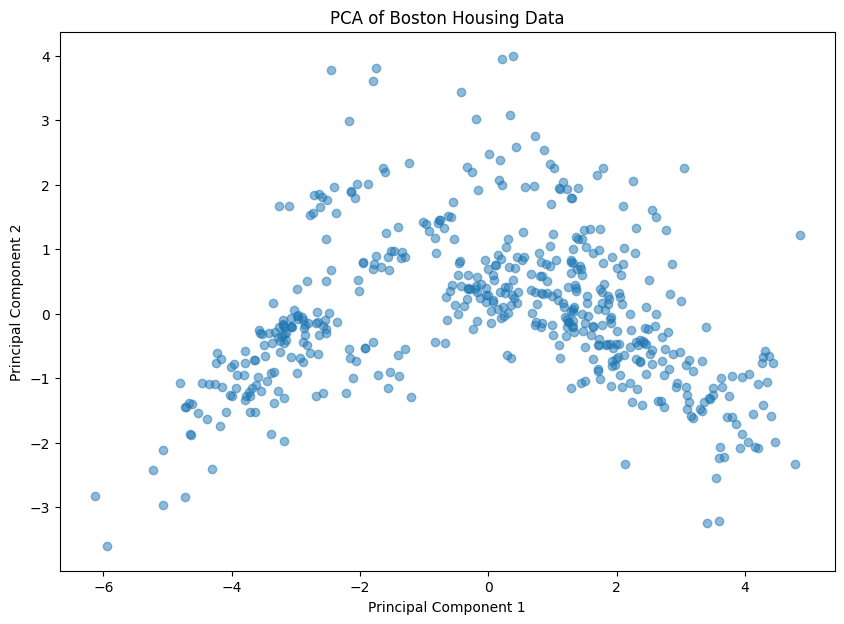

In [29]:
#Plot two principal components python
import matplotlib.pyplot as plt # Import the matplotlib library

# Plot the PCA results
plt.figure(figsize=(10, 7))
plt.scatter(pca_df["PC1"], pca_df["PC2"], alpha=0.5)
plt.title("PCA of Boston Housing Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [30]:
#Vectorize features and target together for model development python

# Prepare the final dataset for regression
vector_assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
data = vector_assembler.transform(dataset).select("features", "medv")

In [31]:
#Split dataset into training and testing datasets python

# Split the data into training and testing sets
train_data, test_data = data.randomSplit([0.7, 0.3], seed=42)


In [33]:
#Fit model for linear regression python
from pyspark.ml.regression import LinearRegression # Import the LinearRegression class

# Fit a linear regression model
lr = LinearRegression(featuresCol="features", labelCol="medv")
lr_model = lr.fit(train_data)


In [34]:
#Find out model coefficients and intercept python

# Get model coefficients and intercept
coefficients = lr_model.coefficients
intercept = lr_model.intercept

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [-0.11928695491962961,0.04726546780246406,0.048610970891376046,2.9395751174276485,-16.524640440134835,4.450208055968567,-0.006468585398538034,-1.3586958237356161,0.27409583913772656,-0.014841244923663446,-0.8649017257130465,0.007797138613616723,-0.42011398849471493]
Intercept: 30.344644109500997


In [36]:
#Evaluate model for test dataset python
from pyspark.ml.evaluation import RegressionEvaluator # Import the RegressionEvaluator class

# Evaluate the model on the test data
predictions = lr_model.transform(test_data)
evaluator = RegressionEvaluator(labelCol="medv", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)

+--------------------+----+------------------+
|            features|medv|        prediction|
+--------------------+----+------------------+
|[0.01096,55.0,2.2...|22.0| 27.41554811195665|
|[0.01381,80.0,0.4...|50.0| 41.02054163950048|
|[0.01439,60.0,2.9...|29.1| 31.45770687678903|
|[0.01501,80.0,2.0...|24.5|27.800872027630003|
|[0.01778,95.0,1.4...|32.9|30.788160024820584|
+--------------------+----+------------------+
only showing top 5 rows



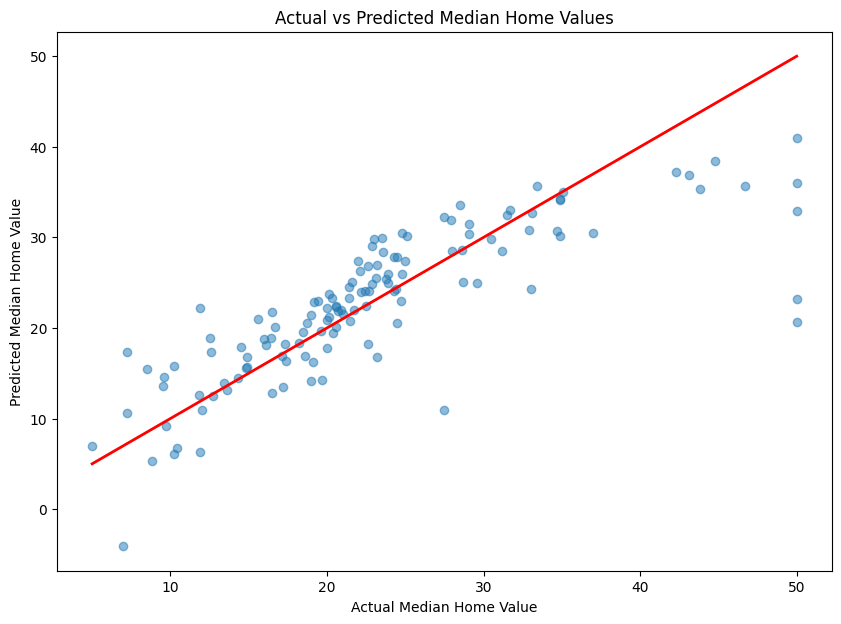

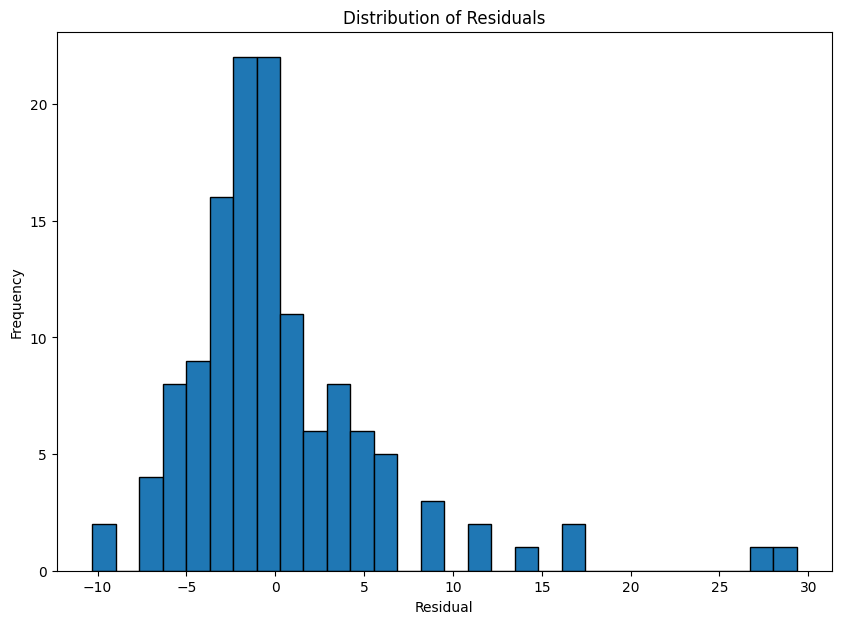

In [37]:

#Perform further analysis for better interpretation of model results python

# Show sample predictions
predictions.select("features", "medv", "prediction").show(5)

# Residual analysis
predictions_df = predictions.toPandas()
plt.figure(figsize=(10, 7))
plt.scatter(predictions_df["medv"], predictions_df["prediction"], alpha=0.5)
plt.plot([predictions_df["medv"].min(), predictions_df["medv"].max()],
         [predictions_df["medv"].min(), predictions_df["medv"].max()],
         color='red', linewidth=2)
plt.title("Actual vs Predicted Median Home Values")
plt.xlabel("Actual Median Home Value")
plt.ylabel("Predicted Median Home Value")
plt.show()

# Distribution of residuals
residuals = predictions_df["medv"] - predictions_df["prediction"]
plt.figure(figsize=(10, 7))
plt.hist(residuals, bins=30, edgecolor='black')
plt.title("Distribution of Residuals")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()